### Demo Notebook that uses FLAML framework's AutoML feature for task oriented ML models

In [1]:
!pip install flaml openml
!pip install --upgrade pandas "dask[complete]"

  Obtaining dependency information for flaml from https://files.pythonhosted.org/packages/e6/5e/f26990e3007c891132c7daec69059c916cc521749451cada3aae27e2f611/FLAML-2.1.1-py3-none-any.whl.metadata
  Using cached FLAML-2.1.1-py3-none-any.whl.metadata (15 kB)
  Using cached openml-0.14.1.tar.gz (131 kB)
  Preparing metadata (setup.py) ... done
  Using cached liac-arff-2.5.0.tar.gz (13 kB)
  Preparing metadata (setup.py) ... done
  Using cached xmltodict-0.13.0-py2.py3-none-any.whl (10.0 kB)
  Obtaining dependency information for minio from https://files.pythonhosted.org/packages/00/1d/8d82eefdad2794b486538c10b3ac3235bf5030097ced83abf5f46b58d408/minio-7.2.0-py3-none-any.whl.metadata
  Using cached minio-7.2.0-py3-none-any.whl.metadata (4.3 kB)
  Obtaining dependency information for pyarrow from https://files.pythonhosted.org/packages/58/4e/bd9bf0aaead74ba46996cf11a608894e1867e8e5f850fd7679018a117c60/pyarrow-14.0.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information

** NOTE : On M1 Mac, to install automl, need to install libomp using `brew install libomp`

In [2]:
!pip install "flaml[automl]" 

  Using cached lightgbm-4.1.0.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for xgboost>=0.90 from https://files.pythonhosted.org/packages/76/e8/260752c1bc8dc856b27cfefaa3fca29ba02a15f649bbf6e9c15ed54e5480/xgboost-2.0.2-py3-none-macosx_12_0_arm64.whl.metadata
  Using cached xgboost-2.0.2-py3-none-macosx_12_0_arm64.whl.metadata (2.0 kB)
Using cached xgboost-2.0.2-py3-none-macosx_12_0_arm64.whl (1.9 MB)
  Created wheel for lightgbm: filename=lightgbm-4.1.0-py3-none-macosx_13_0_arm64.whl size=1377023 sha256=b04e4a076f161118a2d7d29529f83970c9bd2c2dfebef5a65794811823cdc0af
  Stored in directory: /Users/lkrishna/Library/Caches/pip/wheels/d8/44/99/0cd75089a1b4c9c309731bb6cf41747a792516643e67d8ee52
Successfully built lightgbm


2. Classification Example

Download **[Telco Churn](https://www.openml.org/search?type=data&sort=runs&id=42178&status=active)** Dataset from OpenML datasets. The task is to predict if a customer is going to churn.

In [17]:
from flaml.automl.data import load_openml_dataset
from sklearn.model_selection import train_test_split
import pandas as pd
try:
    #X_train, X_test, y_train, y_test = load_openml_dataset(dataset_id=42178, data_dir='./')
    data = pd.read_csv('/Users/lkrishna/git/cortex-fabric-examples/notebooks/flaml/isr/train.csv')
    x_train,x_test,y_train,y_test = train_test_split(data["X"], 
data["y"],test_size = 0.3)
except (ServerError, Exception):
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    from pandas import DataFrame

    X, y = make_classification(n_samples=539383, n_features=7)
    X = DataFrame(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y)

/var/folders/kw/rd_64nwx4zv5_d1twtvctkxr0000gq/T/ipykernel_40187/3811271709.py:6: DtypeWarning: Columns (35,36,37,38,41,43,44,45,48,49,50,51,53,54,55,56,57,58,59,60,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/lkrishna/git/cortex-fabric-examples/notebooks/flaml/isr/train.csv')


NameError: name 'ServerError' is not defined

In [5]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3296,Female,0,No,No,24,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),49.30,1233.25
6397,Male,1,No,No,54,Yes,No,DSL,No,No,Yes,Yes,No,Yes,One year,No,Bank transfer (automatic),65.25,3529.95
6043,Male,0,No,No,3,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,40.15,130.75
5309,Female,0,Yes,No,61,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.25,1278.8
3000,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55


3. Run FLAML

In [6]:
''' import AutoML class from flaml package '''
from flaml import AutoML
automl = AutoML()

In [7]:
settings = {
    "time_budget": 600,  # total running time in seconds
    "metric": 'accuracy', 
                        # check the documentation for options of metrics (https://microsoft.github.io/FLAML/docs/Use-Cases/Task-Oriented-AutoML#optimization-metric)
    "task": 'classification',  # task type
    "log_file_name": 'chrun-experiment.log',  # flaml log file
    "seed": 7654321,    # random seed
}

In [8]:
automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl.logger: 12-04 17:31:16] {1679} INFO - task = classification
[flaml.automl.logger: 12-04 17:31:16] {1690} INFO - Evaluation method: cv
[flaml.automl.logger: 12-04 17:31:16] {1788} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 12-04 17:31:16] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 12-04 17:31:16] {2218} INFO - iteration 0, current learner lgbm


[flaml.automl.logger: 12-04 17:31:16] {2344} INFO - Estimated sufficient time budget=1021s. Estimated necessary time budget=24s.
[flaml.automl.logger: 12-04 17:31:16] {2391} INFO -  at 0.1s,	estimator lgbm's best error=0.2662,	best estimator lgbm's best error=0.2662
[flaml.automl.logger: 12-04 17:31:16] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 12-04 17:31:16] {2391} INFO -  at 0.2s,	estimator lgbm's best error=0.2662,	best estimator lgbm's best error=0.2662
[flaml.automl.logger: 12-04 17:31:16] {2218} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 12-04 17:31:16] {2391} INFO -  at 0.3s,	estimator lgbm's best error=0.1980,	best estimator lgbm's best error=0.1980
[flaml.automl.logger: 12-04 17:31:16] {2218} INFO - iteration 3, current learner xgboost
[flaml.automl.logger: 12-04 17:31:16] {2391} INFO -  at 0.4s,	estimator xgboost's best error=0.2662,	best estimator lgbm's best error=0.1980
[flaml.automl.logger: 12-04 17:31:16] {2218} INFO - ite

/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-04 17:31:54] {2391} INFO -  at 38.4s,	estimator lrl1's best error=0.2243,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:31:54] {2218} INFO - iteration 103, current learner lrl1


/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-04 17:31:54] {2391} INFO -  at 39.0s,	estimator lrl1's best error=0.2243,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:31:54] {2218} INFO - iteration 104, current learner lgbm


/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-04 17:31:56] {2391} INFO -  at 40.0s,	estimator lgbm's best error=0.1975,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:31:56] {2218} INFO - iteration 105, current learner lrl1


/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-04 17:31:56] {2391} INFO -  at 40.6s,	estimator lrl1's best error=0.2243,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:31:56] {2218} INFO - iteration 106, current learner lrl1


/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-04 17:31:57] {2391} INFO -  at 41.3s,	estimator lrl1's best error=0.2243,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:31:57] {2218} INFO - iteration 107, current learner lrl1


/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-04 17:31:58] {2391} INFO -  at 42.0s,	estimator lrl1's best error=0.2242,	best estimator xgboost's best error=0.1920


/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-04 17:31:58] {2218} INFO - iteration 108, current learner xgb_limitdepth
[flaml.automl.logger: 12-04 17:31:58] {2391} INFO -  at 42.4s,	estimator xgb_limitdepth's best error=0.1956,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:31:58] {2218} INFO - iteration 109, current learner xgboost
[flaml.automl.logger: 12-04 17:32:00] {2391} INFO -  at 44.5s,	estimator xgboost's best error=0.1920,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:32:00] {2218} INFO - iteration 110, current learner xgb_limitdepth
[flaml.automl.logger: 12-04 17:32:00] {2391} INFO -  at 44.6s,	estimator xgb_limitdepth's best error=0.1956,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:32:00] {2218} INFO - iteration 111, current learner xgb_limitdepth
[flaml.automl.logger: 12-04 17:32:00] {2391} INFO -  at 44.7s,	estimator xgb_limitdepth's best error=0.1956,	best estimator xgboost's best error=0.1920
[flaml.automl.

/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-04 17:32:01] {2391} INFO -  at 46.0s,	estimator lrl1's best error=0.2242,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:32:01] {2218} INFO - iteration 116, current learner xgboost


/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-04 17:32:03] {2391} INFO -  at 47.0s,	estimator xgboost's best error=0.1920,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:32:03] {2218} INFO - iteration 117, current learner rf
[flaml.automl.logger: 12-04 17:32:03] {2391} INFO -  at 47.2s,	estimator rf's best error=0.2018,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:32:03] {2218} INFO - iteration 118, current learner xgb_limitdepth
[flaml.automl.logger: 12-04 17:32:03] {2391} INFO -  at 47.3s,	estimator xgb_limitdepth's best error=0.1956,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:32:03] {2218} INFO - iteration 119, current learner xgb_limitdepth
[flaml.automl.logger: 12-04 17:32:03] {2391} INFO -  at 47.4s,	estimator xgb_limitdepth's best error=0.1956,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:32:03] {2218} INFO - iteration 120, current learner rf
[flaml.automl.logger: 12-04 17:32:03] {2391

/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-04 17:32:28] {2391} INFO -  at 72.1s,	estimator lrl1's best error=0.2242,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:32:28] {2218} INFO - iteration 178, current learner extra_tree
[flaml.automl.logger: 12-04 17:32:28] {2391} INFO -  at 72.4s,	estimator extra_tree's best error=0.2003,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:32:28] {2218} INFO - iteration 179, current learner xgboost
[flaml.automl.logger: 12-04 17:32:31] {2391} INFO -  at 75.1s,	estimator xgboost's best error=0.1920,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:32:31] {2218} INFO - iteration 180, current learner extra_tree
[flaml.automl.logger: 12-04 17:32:31] {2391} INFO -  at 75.3s,	estimator extra_tree's best error=0.1999,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:32:31] {2218} INFO - iteration 181, current learner xgb_limitdepth
[flaml.automl.logger: 12-04 17:32:31] {2

/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-04 17:33:42] {2391} INFO -  at 147.0s,	estimator lrl1's best error=0.2242,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:33:42] {2218} INFO - iteration 305, current learner rf


/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-04 17:33:43] {2391} INFO -  at 147.4s,	estimator rf's best error=0.1963,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:33:43] {2218} INFO - iteration 306, current learner xgb_limitdepth
[flaml.automl.logger: 12-04 17:33:43] {2391} INFO -  at 147.8s,	estimator xgb_limitdepth's best error=0.1931,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:33:43] {2218} INFO - iteration 307, current learner xgb_limitdepth
[flaml.automl.logger: 12-04 17:33:44] {2391} INFO -  at 148.2s,	estimator xgb_limitdepth's best error=0.1931,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:33:44] {2218} INFO - iteration 308, current learner xgboost
[flaml.automl.logger: 12-04 17:33:44] {2391} INFO -  at 148.5s,	estimator xgboost's best error=0.1920,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:33:44] {2218} INFO - iteration 309, current learner xgboost
[flaml.automl.logger: 12-04 1

/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-04 17:34:58] {2391} INFO -  at 222.2s,	estimator lrl1's best error=0.2242,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:34:58] {2218} INFO - iteration 348, current learner xgboost


/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-04 17:35:03] {2391} INFO -  at 227.1s,	estimator xgboost's best error=0.1920,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:35:03] {2218} INFO - iteration 349, current learner xgboost
[flaml.automl.logger: 12-04 17:35:05] {2391} INFO -  at 229.9s,	estimator xgboost's best error=0.1920,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:35:05] {2218} INFO - iteration 350, current learner rf
[flaml.automl.logger: 12-04 17:35:06] {2391} INFO -  at 230.2s,	estimator rf's best error=0.1961,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:35:06] {2218} INFO - iteration 351, current learner xgboost
[flaml.automl.logger: 12-04 17:35:09] {2391} INFO -  at 233.4s,	estimator xgboost's best error=0.1920,	best estimator xgboost's best error=0.1920
[flaml.automl.logger: 12-04 17:35:09] {2218} INFO - iteration 352, current learner xgboost
[flaml.automl.logger: 12-04 17:35:16] {2391} INFO -  at 240.6s

/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-04 17:35:55] {2391} INFO -  at 279.9s,	estimator lrl1's best error=0.2242,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:35:55] {2218} INFO - iteration 366, current learner xgboost


/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-04 17:35:57] {2391} INFO -  at 281.5s,	estimator xgboost's best error=0.1916,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:35:57] {2218} INFO - iteration 367, current learner xgboost
[flaml.automl.logger: 12-04 17:36:11] {2391} INFO -  at 295.9s,	estimator xgboost's best error=0.1916,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:36:11] {2218} INFO - iteration 368, current learner xgboost
[flaml.automl.logger: 12-04 17:36:20] {2391} INFO -  at 304.7s,	estimator xgboost's best error=0.1916,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:36:20] {2218} INFO - iteration 369, current learner xgboost
[flaml.automl.logger: 12-04 17:36:22] {2391} INFO -  at 306.2s,	estimator xgboost's best error=0.1916,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:36:22] {2218} INFO - iteration 370, current learner lrl1


/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-04 17:36:22] {2391} INFO -  at 306.7s,	estimator lrl1's best error=0.2242,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:36:22] {2218} INFO - iteration 371, current learner xgboost


/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-04 17:36:34] {2391} INFO -  at 318.0s,	estimator xgboost's best error=0.1916,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:36:34] {2218} INFO - iteration 372, current learner lrl1


/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-04 17:36:34] {2391} INFO -  at 318.5s,	estimator lrl1's best error=0.2242,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:36:34] {2218} INFO - iteration 373, current learner xgboost
[flaml.automl.logger: 12-04 17:36:36] {2391} INFO -  at 320.3s,	estimator xgboost's best error=0.1916,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:36:36] {2218} INFO - iteration 374, current learner xgboost
[flaml.automl.logger: 12-04 17:36:42] {2391} INFO -  at 326.2s,	estimator xgboost's best error=0.1916,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:36:42] {2218} INFO - iteration 375, current learner xgboost
[flaml.automl.logger: 12-04 17:36:46] {2391} INFO -  at 330.1s,	estimator xgboost's best error=0.1916,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:36:46] {2218} INFO - iteration 376, current learner xgboost
[flaml.automl.logger: 12-04 17:36:51] {2391} INFO -  at

/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[flaml.automl.logger: 12-04 17:37:34] {2391} INFO -  at 378.8s,	estimator lrl1's best error=0.2242,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:37:34] {2218} INFO - iteration 389, current learner xgboost
[flaml.automl.logger: 12-04 17:37:36] {2391} INFO -  at 380.3s,	estimator xgboost's best error=0.1916,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:37:36] {2218} INFO - iteration 390, current learner xgboost
[flaml.automl.logger: 12-04 17:37:48] {2391} INFO -  at 392.3s,	estimator xgboost's best error=0.1916,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:37:48] {2218} INFO - iteration 391, current learner xgboost
[flaml.automl.logger: 12-04 17:37:50] {2391} INFO -  at 394.3s,	estimator xgboost's best error=0.1916,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:37:50] {2218} INFO - iteration 392, current learner xgboost
[flaml.automl.logger: 12-04 17:37:57] {2391} INFO -  at

/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-04 17:38:45] {2391} INFO -  at 449.6s,	estimator lrl1's best error=0.2242,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:38:45] {2218} INFO - iteration 407, current learner xgboost


/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-04 17:39:01] {2391} INFO -  at 465.7s,	estimator xgboost's best error=0.1916,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:39:01] {2218} INFO - iteration 408, current learner rf
[flaml.automl.logger: 12-04 17:39:02] {2391} INFO -  at 466.0s,	estimator rf's best error=0.1961,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:39:02] {2218} INFO - iteration 409, current learner xgboost
[flaml.automl.logger: 12-04 17:39:03] {2391} INFO -  at 467.4s,	estimator xgboost's best error=0.1916,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:39:03] {2218} INFO - iteration 410, current learner xgboost
[flaml.automl.logger: 12-04 17:39:12] {2391} INFO -  at 476.6s,	estimator xgboost's best error=0.1916,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:39:12] {2218} INFO - iteration 411, current learner lrl1


/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-04 17:39:13] {2391} INFO -  at 477.1s,	estimator lrl1's best error=0.2242,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:39:13] {2218} INFO - iteration 412, current learner xgboost


/Users/lkrishna/opt/anaconda3/envs/llamaindex/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 12-04 17:39:37] {2391} INFO -  at 501.9s,	estimator xgboost's best error=0.1916,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:39:37] {2218} INFO - iteration 413, current learner xgboost
[flaml.automl.logger: 12-04 17:39:38] {2391} INFO -  at 502.7s,	estimator xgboost's best error=0.1916,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:39:38] {2218} INFO - iteration 414, current learner rf
[flaml.automl.logger: 12-04 17:39:39] {2391} INFO -  at 503.0s,	estimator rf's best error=0.1961,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:39:39] {2218} INFO - iteration 415, current learner xgboost
[flaml.automl.logger: 12-04 17:39:44] {2391} INFO -  at 508.2s,	estimator xgboost's best error=0.1916,	best estimator xgboost's best error=0.1916
[flaml.automl.logger: 12-04 17:39:44] {2218} INFO - iteration 416, current learner rf
[flaml.automl.logger: 12-04 17:39:44] {2391} INFO -  at 508.5s,	est

In [9]:
'''retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: xgboost
Best hyperparmeter config: {'n_estimators': 812, 'max_leaves': 8, 'min_child_weight': 1.3504663196694064, 'learning_rate': 0.005655556351356782, 'subsample': 0.9056658071987661, 'colsample_bylevel': 0.9977650546938394, 'colsample_bytree': 0.9958341075737026, 'reg_alpha': 0.0039046771924869227, 'reg_lambda': 1.198427194218317}
Best accuracy on validation data: 0.8084
Training duration of best run: 0.9982 s


In [10]:
automl.model.estimator

XGBClassifier(base_score=None, booster=None, callbacks=[],
              colsample_bylevel=0.9977650546938394, colsample_bynode=None,
              colsample_bytree=0.9958341075737026, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy='lossguide', importance_type=None,
              interaction_constraints=None, learning_rate=0.005655556351356782,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=0, max_leaves=8,
              min_child_weight=1.3504663196694064, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=812,
              n_jobs=-1, num_parallel_tree=None, random_state=None, ...)

In [11]:
'''pickle and save the automl object'''
import pickle
with open('automl.pkl', 'wb') as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)
'''load pickled automl object'''
with open('automl.pkl', 'rb') as f:
    automl = pickle.load(f)

In [12]:
'''compute predictions of testing dataset''' 
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)
print('True labels', y_test)
y_pred_proba = automl.predict_proba(X_test)[:,1]

Predicted labels ['No' 'No' 'No' ... 'No' 'No' 'No']
True labels 2200    No
4627    No
3225    No
2828    No
3768    No
        ..
3184    No
2551    No
5735    No
5096    No
450     No
Name: Churn, Length: 1761, dtype: object


In [13]:
''' compute different metric values on testing dataset'''
from flaml.ml import sklearn_metric_loss_score
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))

accuracy = 0.7915956842703009
roc_auc = 0.834133423409332
log_loss = 0.427026046633671


In [14]:
from flaml.automl.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename=settings['log_file_name'], time_budget=240)
for config in config_history:
    print(config)

{'Current Learner': 'lgbm', 'Current Sample': 5282, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}}
{'Current Learner': 'lgbm', 'Current Sample': 5282, 'Current Hyper-parameters': {'n_estimators': 18, 'num_leaves': 4, 'min_child_samples': 18, 'learning_rate': 0.2293009676418639, 'log_max_bin': 9, 'colsample_bytree': 0.9086551727646448, 'reg_alpha': 0.0015561782752413472, 'reg_lambda': 0.33127416269768944}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 18, 'num_leaves': 4, 'min_child_samples': 18, 'learning_rate': 0.2293009676418639, 'log_max_bin': 9, 'colsample_byt

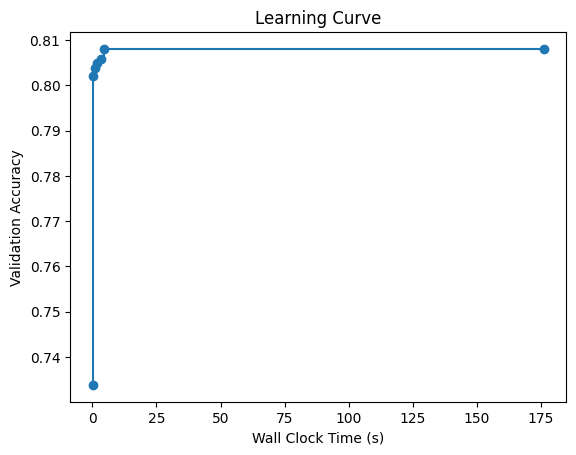

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation Accuracy')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()